In [14]:
!pip install pennylane pennylane-qiskit

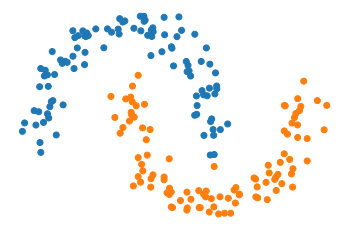

In [15]:
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=200, noise=0.1)
y_hot = tf.keras.utils.to_categorical(y, num_classes=2)  # one-hot encoded labels

c = ["#1f77b4" if y_ == 0 else "#ff7f0e" for y_ in y]  # colours for each class
plt.axis("off")
plt.scatter(X[:, 0], X[:, 1], c=c)
plt.show()

In [16]:
import pennylane as qml

n_qubits = 2
dev = qml.device("qiskit.aer", wires=n_qubits)

@qml.qnode(dev)
def qnode(inputs, weights):
    qml.templates.AngleEmbedding(inputs, wires=range(n_qubits))
    qml.templates.BasicEntanglerLayers(weights, wires=range(n_qubits))
    return [qml.expval(qml.PauliZ(wires=i)) for i in range(n_qubits)]

In [17]:
n_layers = 6
weight_shapes = {"weights": (n_layers, n_qubits)}
qlayer = qml.qnn.KerasLayer(qnode, weight_shapes, output_dim=n_qubits)

In [18]:
clayer_1 = tf.keras.layers.Dense(2)
clayer_2 = tf.keras.layers.Dense(2, activation="softmax")
model = tf.keras.models.Sequential([clayer_1, qlayer, clayer_2])
opt = tf.keras.optimizers.SGD(learning_rate=0.2)
model.compile(opt, loss="mae", metrics=["accuracy"])
X = X.astype("float32")
y_hot = y_hot.astype("float32")
fitting = model.fit(X, y_hot, epochs=3, batch_size=2, validation_split=0.25, verbose=1)

Epoch 1/3
75/75 [==============================] - 83s 1s/step - loss: 0.2759 - accuracy: 0.7867 - val_loss: 0.2074 - val_accuracy: 0.8200
Epoch 2/3
75/75 [==============================] - 83s 1s/step - loss: 0.1820 - accuracy: 0.8533 - val_loss: 0.2135 - val_accuracy: 0.7800
Epoch 3/3
75/75 [==============================] - 83s 1s/step - loss: 0.1729 - accuracy: 0.8333 - val_loss: 0.1612 - val_accuracy: 0.8400
